# 5. Improve a model

First prediction = baseline prediction. <br>
First model = baseline model.

**From a data perspective:**
* Could we collect more data? (more rows)
* Could we improve our data? (more feature)

**From a model perspective:**
* Is there a better model we could use? (alternate model)
* Could we improve the current model? (hyperparameter tuning)

**Parameters vs Hyperparameters:**
* Parameters = model find these patterns in data
* Hyperparameter = setting on a model you can adjust to (potentially) improves its ability to find patterns

**Three ways to adjust hyperparameters:**
1. By hand
2. Randomly with `RandomizedSearchCV`
3. Exhaustively with `GridSearchCV`

**End of the notebook (One tips there)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [3]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning hyperparameter by hand
Let's make 3 sets, training, validation and test

We are going to try and adjust
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [48]:
def evaluate_preds(y_true, y_preds):
    """Perform evaluation comparison on y_true and y_predicted labels on a classification model"""
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Accuracy: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    return metric_dict

In [28]:
def train_val_test_split(X,y):
    from sklearn.model_selection import train_test_split
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.17647058823529413)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [59]:
#importing data
heart_df = pd.read_csv('./data/heart-disease.csv')

# creating X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

#setup random seed
np.random.seed(42)

# train val and test split
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X,y)

# from sklearn.ensemble import RandomForestClassifier

# model initiation
clf = RandomForestClassifier()

# fit the model to the data (training machine learning model)
clf.fit(X_train, y_train)

# make prediction on validation sets
y_preds = clf.predict(X_val)

# evaluate prediction
baseline_matrics = evaluate_preds(y_val, y_preds)

Accuracy: 86.96
Precision: 0.92
Recall: 0.85
F1-score: 0.88


In [60]:
np.random.seed(42)
# create a second classifier with different hyperparameter
clf2 = RandomForestClassifier(n_estimators=100)

# fit the model to the data (training machine learning model)
clf2.fit(X_train, y_train)

# make prediction on validation sets
y_preds2 = clf2.predict(X_val)

# evaluate prediction
clf2_metric = evaluate_preds(y_val, y_preds2)

Accuracy: 80.43
Precision: 0.90
Recall: 0.73
F1-score: 0.81


In [61]:
np.random.seed(42)
# create a second classifier with different hyperparameter
clf3 = RandomForestClassifier(n_estimators=100, max_depth=10)

# fit the model to the data (training machine learning model)
clf3.fit(X_train, y_train)

# make prediction on validation sets
y_preds3 = clf3.predict(X_val)

# evaluate prediction
clf3_metric = evaluate_preds(y_val, y_preds3)

Accuracy: 82.61
Precision: 0.91
Recall: 0.77
F1-score: 0.83


In [67]:
# you can go forever by hand, now test on test split
y_preds_test = clf3.predict(X_test)
clf3_metric_on_test = evaluate_preds(y_test, y_preds_test)

Accuracy: 84.78
Precision: 0.89
Recall: 0.86
F1-score: 0.87


## 5.2 Tuning hyperparameter randomly with `RandomizedSearchCV`

In [76]:
# function to get evaluation matrics in one shot
def evaluate_preds(y_true, y_preds):
    """Perform evaluation comparison on y_true and y_predicted labels on a classification model"""
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Accuracy: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    return metric_dict

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# creating grid to hyperparameter tuning
grid = {
    'n_estimators': [10,100,200, 500,1000, 1200],
    'max_depth': [None,5,10,20,30],
    'max_features':["auto", "sqrt"],
    'min_samples_split':[2,4,6],
    'min_samples_leaf':[1,2,4]
}
np.random.seed(42)

#importing data
heart_df = pd.read_csv('./data/heart-disease.csv')

# creating X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

#setup random seed
np.random.seed(42)

# train val and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1) # n_jobs = how much computer resource do i want to dedicated

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid,
                            n_iter=10, #number of models to try
                            cv = 5,
                            verbose=2)
# fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.0s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.7s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


In [78]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10}

In [91]:
# when we call predict, RandomizedSearchCV version of clf is going to use these best parameters
rs_y_preds = rs_clf.predict(X_test)
rs_clf_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 86.89
Precision: 0.85
Recall: 0.91
F1-score: 0.88


## 5.3 Tuning hyperparameter with GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

# creating grid to hyperparameter tuning,  we can use best parameters of RandomizedSearchCV as refference to gridSearchCV
# gridSearchCV use all combination of hyperparameter in list
grid_2 = {
    'n_estimators': [100,200,300],
    'max_depth': [10],
    'max_features':["auto", "sqrt"],
    'min_samples_split':[4],
    'min_samples_leaf':[2,4]
}
np.random.seed(42)

#importing data
heart_df = pd.read_csv('./data/heart-disease.csv')

# creating X, y
X = heart_df.drop('target', axis=1)
y = heart_df['target']

#setup random seed
np.random.seed(42)

# train val and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1) # n_jobs = how much computer resource do i want to dedicated

# setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf, 
                      param_grid=grid_2,
                      cv = 5,
                      verbose=2)
# fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   0.8s
[CV] max_depth=10, max_features=auto, min_samples_le

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   0.3s
[CV] max_depth=10, max_features=sqrt, min_samples_le

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   34.5s finished


In [89]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 200}

In [92]:
# when we call predict, RandomizedSearchCV version of clf is going to use these best parameters
gs_y_preds = rs_clf.predict(X_test)
gs_clf_metrics = evaluate_preds(y_test, gs_y_preds);

Accuracy: 86.89
Precision: 0.85
Recall: 0.91
F1-score: 0.88


**Let's compare our different models metrics**

In [93]:
compare_metrics = pd.DataFrame({"Baseline": baseline_matrics,
                                "By_Hand_clf_2": clf2_metric,
                                "By_Hand_clf_3": clf3_metric,
                                "RandomSearch": rs_clf_metrics,
                                "GridSearch": gs_clf_metrics
                               })
compare_metrics

,Baseline,By_Hand_clf_2,By_Hand_clf_3,RandomSearch,GridSearch
accuracy,0.87,0.80,0.83,0.87,0.87
precision,0.92,0.90,0.91,0.85,0.85
recall,0.85,0.73,0.77,0.91,0.91
f1,0.88,0.81,0.83,0.88,0.88


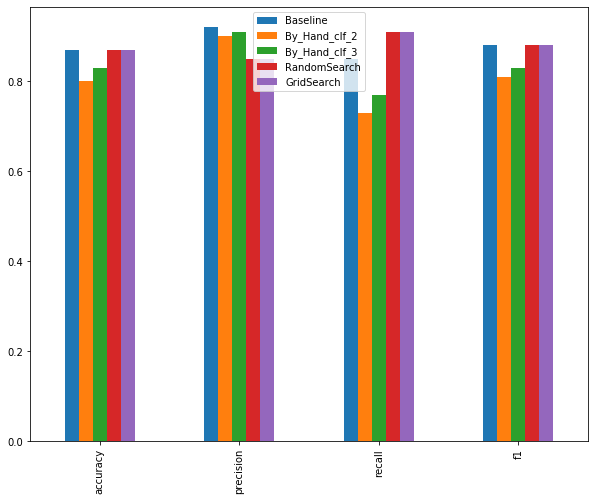

In [94]:
compare_metrics.plot.bar(figsize=(10,8))

# Tips

**Forward and Backward Features selection**
* Forward selection begins with an empty equation. Predictors are added one at a time beginning with the predictor with the  highest correlation with the dependent variable. ... Once in the equation, the variable remains there.
* Backward elimination (or backward deletion) is the reverse process.